# Análise e Transformação de Dados @ DEI-FCTUC
## Uma resolução dos exercícios da Ficha Prática nº 2 usando MATLAB
### Autoria: Alberto Cardoso ©DEI2021/2022

Objetivo: Pretende-se adquirir competências para a análise de sinais de tempo contínuo e de tempo discreto, nomeadamente para análise das suas propriedades e para o cálculo da sua energia.

### Exercícios:

<strong>Exercício 1.</strong> Pretende-se analisar o sinal de tempo contínuo $x_1(t)=A_1 sin(\omega_at)cos(\omega_bt)+A_2cos(\omega_ct)^2$ ao longo do seu período fundamental, em que:

$A_1=2(mod(PL\#,2)+1)$, $A_2=6(mod(PL\#,2)+1)$,   com $PL\#$ = nº da turma PL

$\omega_a=mod(PL\#,5)+2$,  $\omega_b=mod(PL\,7)+7$,   $\omega_c=mod(PL\#,9)+1$

**Exercício 1.1** Determinar as frequências (linear e angular) fundamentais e o período fundamental de $x_1(t)$, tendo em conta a seguinte formulação de Fourier para sinais de tempo contínuo:
$x_1(t)=\sum_{m=0}^{\infty}C_mcos(m\omega_0t+\theta_m)$ .

In [1]:
PL=1; % Número da turma PL
A1=2*(mod(PL,2)+1);
A2=6*(mod(PL,2)+1);
wa=mod(PL,5)+2;
wb=mod(PL,7)+7;
wc=mod(PL,9)+1;

% sinal x1(t)
syms t
x1ts=A1*sin(wa*t)*cos(wb*t)+A2*cos(wc*t)^2

% PL1: x1(t) =  4*sin(3*t)*cos(8*t) + 12*cos(2*t)**2
% Considerando as relações trigonométricas, verifica-se que 
% as frequências presentes no sinal são:
% w pertencente a {3+8, 3-8, 2+2, 2-2} ou seja {0, 4, 5, 11} rad/s
w = [0,4,5,11]

% frequência angular fundamental, w0, em rad/s
w0 = gcd(sym(w))
% frequência linear fundamental, f0, em Hz
f0 = w0/(2*pi)
% período fundamental, T0, em s
T0 = 1/f0

% expressão equivalente de x1(t) conforme formulação de Fourier
x1teqs=6*cos(0)+6*cos(4*t+0)+2*cos(5*t+pi/2)+2*cos(11*t-pi/2)

 
x1ts =
 
12*cos(2*t)^2 + 4*cos(8*t)*sin(3*t)
 

w =

     0     4     5    11

 
w0 =
 
1
 
 
f0 =
 
1/(2*pi)
 
 
T0 =
 
2*pi
 
 
x1teqs =
 
6*cos(4*t) + 2*cos(5*t + pi/2) + 2*cos(11*t - pi/2) + 6
 



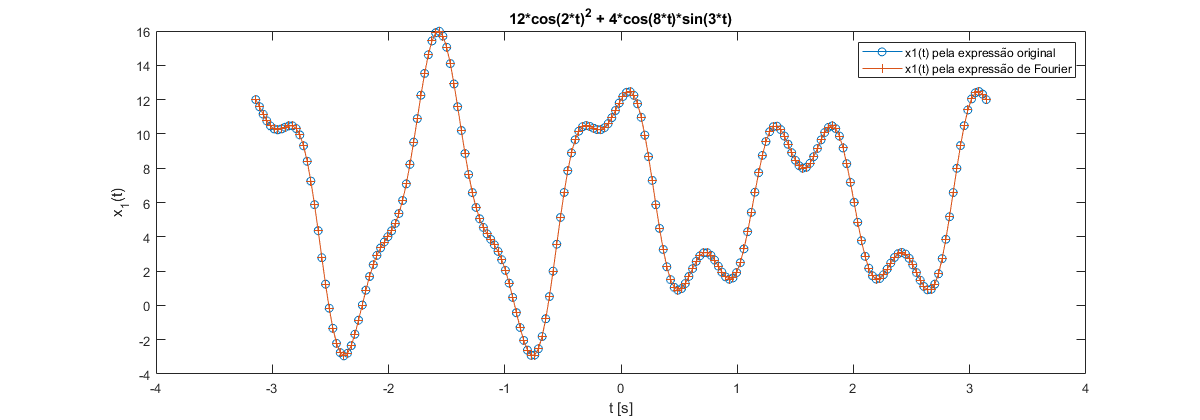

In [2]:
%plot inline -w 1200
% obtenção e plot de x1 e x1eq
tt=linspace(-pi,pi,200);
x1t=double(subs(x1ts,tt));
x1teq=double(subs(x1teqs,tt));

plot(tt,x1t,'-o',tt,x1teq,'-+')
xlabel('t [s]')
ylabel('x_1(t)')
title(string(x1ts))
legend('x1(t) pela expressão original', ...
'x1(t) pela expressão de Fourier','Location','northeast')

**Exercício 1.2** Verificar a paridade do sinal $x_1(t)$.

In [3]:
x1ts
x1_ts=subs(x1ts,-t)
if x1ts==x1_ts,
    disp('x1(t) é um sinal par')
elseif x1ts == -x1_ts,
    disp('x1(t) é um sinal ímpar')
else
    disp('x1(t) é um sinal nem par nem ímpar')
end

 
x1ts =
 
12*cos(2*t)^2 + 4*cos(8*t)*sin(3*t)
 
 
x1_ts =
 
12*cos(2*t)^2 - 4*cos(8*t)*sin(3*t)
 
x1(t) é um sinal nem par nem ímpar



**Exercício 1.3** Obter a expressão do sinal de tempo discreto $x_1[n]$ que resulta de $x_1(t)$ usando $t=nT_s$, em que $T_s$ representa o período de amostragem com que o sinal de tempo contínuo $x_1(t)$ é amostrado.

In [4]:
syms t n Ts
x1ts
x1ns=subs(x1ts,n*Ts)

 
x1ts =
 
12*cos(2*t)^2 + 4*cos(8*t)*sin(3*t)
 
 
x1ns =
 
4*cos(8*Ts*n)*sin(3*Ts*n) + 12*cos(2*Ts*n)^2
 



**Exercício 1.4** Determinar a frequência angular fundamental e o período fundamental de $x_1[n]$, tendo em conta a seguinte formulação de Fourier para sinais de tempo contínuo:
$x_1[n]=\sum_{m=0}^{\infty}C_mcos[m\Omega_0n+\theta_m]$ .

In [5]:
% Tendo em conta as frequências angulares presentes no sinal x1(t)
% obtém-se a frequência angular fundamental de x1[n], Omega0, em rad
Omega0s = gcd(sym(w)*Ts)

% período fundamental de x1[n], N
Ns = 2*pi/Omega0s

% expressão equivalente de x1(t) conforme formulação de Fourier
x1neqs=subs(x1teqs,n*Ts)

 
Omega0s =
 
Ts
 
 
Ns =
 
(2*pi)/Ts
 
 
x1neqs =
 
6*cos(4*Ts*n) + 2*cos(pi/2 + 5*Ts*n) + 2*cos(pi/2 - 11*Ts*n) + 6
 



**Exercício 1.5** Representar no mesmo gráfico o sinal $x_1(t)$ para $t \in [-\pi,\pi]$, considerando $t$ com 1000 elementos e um traçado com linha contínua, e o sinal $x_1[n]$, considerando um período de amostragem (passo) $T_s = 0.1s$, num intervalo para $n$ correspondente a $x_1(t)$ para $t \in [-\pi,\pi]$ e a representação apenas das amostras.


Omega0 =

    0.1000


N =

    62




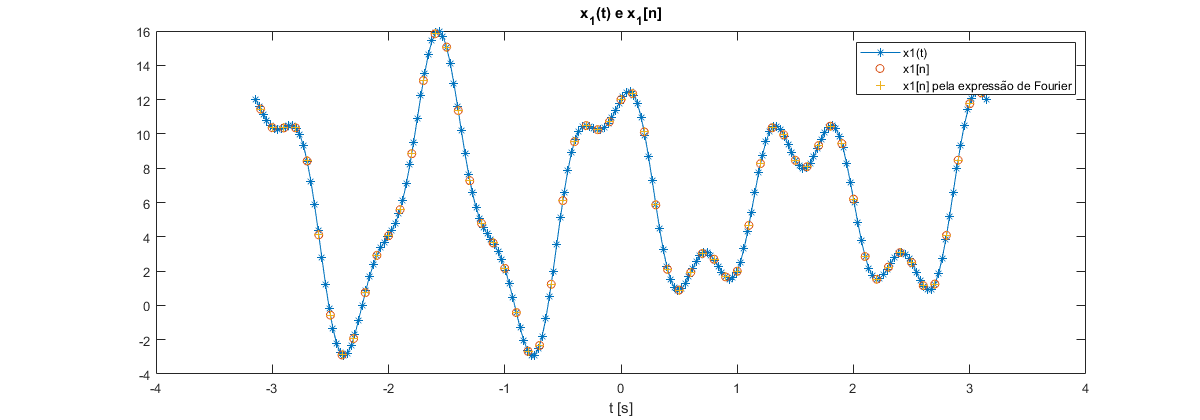

In [6]:
% obtenção e plot de x1(t) , x1[n] e x1eq[n]
Tsample=0.1;
Omega0=double(subs(Omega0s,Tsample))
N=fix(double(subs(Ns,Tsample)))

nn=fix(-N/2):fix(N/2);
x1n=double(subs(x1ns,{n,Ts},{nn,Tsample}));
x1neq=double(subs(x1neqs,{n,Ts},{nn,Tsample}));

plot(tt,x1t,'-*',nn*Tsample,x1n,'o',nn*Tsample,x1neq,'+')
xlabel('t [s]')
title('x_1(t) e x_1[n]')
legend('x1(t)', 'x1[n]',...
'x1[n] pela expressão de Fourier','Location','northeast')

<strong>Exercício 2.</strong> Pretende-se calcular a energia de um sinal de tempo contínuo $x(t)$ num intervalo $t \in [t_i,t_f]s$.

**Exercício 2.1** Escrever funções que permitam o cálculo da energia de $x(t)$ pelos métodos de integração numérica, regra dos trapézios e regra de Simpson (usando implementações próprias). 

In [ ]:
%%file trapezioVsym.m

function Int=trapezioVsym(fun,t1,tn,np)
h=(tn-t1)/(np-1); % calcula h para o nº de pontos np
tv=t1+h:h:tn-h;%Obter valores intermédios de tempo
% Obter valores extremos
ft1=double(subs(fun,t1));
ftn=double(subs(fun,tn));
% Calcular o integral
Int=h*(((ft1+ftn)/2)+sum(double(subs(fun,tv))));
end

In [ ]:
%%file simpsonVsym.m

function Int=simpsonVsymnp(fun,t1,tn,np)
h=(tn-t1)/(np-1); % calcula h para o nº de pontos np que dever ímpar
%Obter valor da função nos extremos de integração, i.e., em t1 e tn
ft1=double(subs(fun,t1));
ftn=double(subs(fun,tn));
%Obter valor da função nos pontos intermédios separados por h un. de tempo
%Para i par
tvp=[t1+h:2*h:tn-h];
sfp=sum(double(subs(fun,tvp)));

%Para i ímpar
tvi=[t1+2*h:2*h:tn-h];
sfi=sum(double(subs(fun,tvi)));

%Calcular o valor final do integral
Int=(h/3)*(ft1+ftn+4*sfp+2*sfi);
end

**Exercício 2.2** Calcular os valores aproximados da energia do sinal $x_1(t)$ para o intervalo $[-\pi,\pi]$ e usando a regra dos trapézios e a regra de Simpson.

**2.2.1** Calcular o valor exato da energia obtida através do cálculo do integral simbólico para o mesmo intervalo.

**2.2.2** Verificar a influência do passo ($h$) no erro, isto é, na diferença entre energia obtida usando cálculo numérico e obtida usando o integral exato. 

**2.2.3** Calcular o tempo de execução dos diferentes métodos.

In [9]:
% sinal x1(t)
syms t
inter=[-pi,pi];

x1ts

tic
Ex1t=double(int(abs(x1ts)^2,inter(1),inter(2))) % Valor exato da Energia
Tempo_Ex1t=toc()

np=13; % escolha do nº de pontos a considerar
tic
Ex1tT=trapezioVsym(abs(x1ts)^2,inter(1),inter(2),np) %Regra dos Trapezios
Tempo_Ex1tT=toc() %Calcular tempo de execução Regra dos Trapézios
erro=abs(Ex1t-Ex1tT)

tic
Ex1tS=simpsonVsym(abs(x1ts)^2,inter(1),inter(2),np) %Regra de Simpson
Tempo_Ex1tS=toc() %Calcular tempo de execução da Regra de Simpson
erro=abs(Ex1t-Ex1tS)

 
x1ts =
 
12*cos(2*t)^2 + 4*cos(8*t)*sin(3*t)
 

Ex1t =

  364.4247


Tempo_Ex1t =

   28.2605


Ex1tT =

  364.4247


Tempo_Ex1tT =

    0.0742


erro =

   5.6843e-14


Ex1tS =

  372.8023


Tempo_Ex1tS =

    0.0870


erro =

    8.3776




**Exercício 2.3** Calcular a energia de $x_1[n]$ num intervalo para $n$ correspondente a $t\in[-\pi,\pi]s$. Considerar $T_s = 0.1s$.

In [10]:
%Cálculo da energia do sinal x[n]
Ts=0.1;
nn=[fix(-pi/Ts):fix(pi/Ts)];

x1n=double(subs(x1ts,nn*Ts));
Ex1n=sum(x1n.^2) %Valor da energia do sinal discreto


Ex1n =

   3.6686e+03




**Exercício 2.4** Calcular a energia dos seguintes sinais e comparar os valores obtidos entre si.
 
$x_2(t)=6cos(3t)sin(4t)$ no intervalo $t \in [-\pi,\pi]s$ e no intervalo $t \in [-2\pi,2\pi]s$.

$x_3(t)=6cos(3t-3)sin(4t-4)$ no intervalo $t \in [-\pi,\pi]s$.

$x_4(t)=3cos(3t)sin(4t)$ no intervalo $t \in [-\pi,\pi]s$.

In [11]:
syms t
inter=[-pi/2,pi/2];

x2ts=6*cos(3*t)*sin(4*t)
Ex2t=int(abs(x2ts)^2,inter(1),inter(2))

Ex2t2=int(abs(x2ts)^2,2*inter(1),2*inter(2))

x3ts=6*cos(3*t-3)*sin(4*t-4)
Ex3t=int(abs(x3ts)^2,inter(1),inter(2))

x4ts=3*cos(3*t)*sin(4*t)
Ex4t=int(abs(x4ts)^2,inter(1),inter(2))

 
x2ts =
 
6*cos(3*t)*sin(4*t)
 
 
Ex2t =
 
9*pi
 
 
Ex2t2 =
 
18*pi
 
 
x3ts =
 
6*cos(3*t - 3)*sin(4*t - 4)
 
 
Ex3t =
 
9*pi
 
 
x4ts =
 
3*cos(3*t)*sin(4*t)
 
 
Ex4t =
 
(9*pi)/4
 

